In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import itertools


from iarchitect import envs,trainer as trainer_iarch
from iarchitect.agents import dqn as dqn_iarch
from iarchitect.common import show_policy_behaviour,create_policy_eval_video
from iarchitect.common.callbacks import output_updater,update_plotter,fig_trainer,results_saver,trainer_saver

from tf_agents.agents import DdpgAgent,DqnAgent

from tf_agents.utils import common
from tf_agents import networks
from tf_agents.networks import sequential
from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec
from tf_agents.environments import wrappers
from tf_agents.environments import suite_gym
from tf_agents.trajectories import time_step as ts
from tf_agents.metrics import py_metrics,tf_metrics
from tf_agents.drivers import py_driver,dynamic_episode_driver,dynamic_step_driver
from tf_agents.policies import random_py_policy,random_tf_policy,PyTFEagerPolicy
from tf_agents.replay_buffers import tf_uniform_replay_buffer,py_uniform_replay_buffer

from tensorflow import Tensor,Variable
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras import initializers

2022-03-08 10:03:13.914040: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-08 10:03:13.914084: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
SOLUTION_NAME = "Aligned_Row_Big"

In [4]:
environment = envs.AlignedRowEnv(16,action_float=False,
                            fail_on_same=True,
                            observation_1D = True,
                           rewards = {
                     "already_filled":-10,
                     "max_iter":-10,
                     "new_value":1,
                     "success":10
                 })
utils.validate_py_environment(environment, episodes=5)
train_env = tf_py_environment.TFPyEnvironment(environment)

In [5]:
def dense_layer(num_units):
    return layers.Dense(
        num_units,
        activation="relu",
        kernel_initializer=initializers.VarianceScaling(
            scale=2.0, mode='fan_in', distribution='truncated_normal'))
def network(fc_layers_units,dimension_q_values):
    q_values_layer = layers.Dense(
            dimension_q_values,
            activation=None,
            kernel_initializer=initializers.RandomUniform(
                minval=-0.03, maxval=0.03),
            bias_initializer=initializers.Constant(-0.2))
    return sequential.Sequential([layers.Flatten()] + [dense_layer(n) for n in fc_layers_units] + [q_values_layer])


In [10]:
agent = DqnAgent(
        train_env.time_step_spec(),
        train_env.action_spec(),
        q_network=network((40,40),environment.dimension),
        optimizer=Adam(learning_rate=0.0005),
        td_errors_loss_fn=common.element_wise_squared_loss,)
agent.initialize()

In [11]:
def plot_obs(obs,ax):
    return ax.imshow(obs,vmin=0.0,vmax=1.0)

In [12]:
trainer = trainer_iarch.Trainer(train_env,agent)
trainer.initialize_buffer(min_size=640,random_policy=True)

In [16]:
fig_tr = fig_trainer(6,6,figsize=(20,20))

#   
#  output_updater(fig_tr),
callbacks = [update_plotter(fig_tr,plot_obs),
             results_saver(10,SOLUTION_NAME,fig_tr),
             trainer_saver(10,SOLUTION_NAME)
             ]



trainer.run(callbacks=callbacks,
            buffer_size_increase_per_iteration = 100,
            sample_batch_size_experience = 64,
            num_iterations_train = 100,
            num_steps_per_row_in_experience = 2
           )

0


INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308100813_0/assets


/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:522: UserWarning: Encoding a StructuredValue with type tf_agents.policies.greedy_policy.DeterministicWithLogProb_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308100813_0/assets


1
2
3
4
5
6
7
8
9
10


INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308100902_10/assets


/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:522: UserWarning: Encoding a StructuredValue with type tf_agents.policies.greedy_policy.DeterministicWithLogProb_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308100902_10/assets


11
12
13
14
15
16
17
18
19
20


INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308100953_20/assets


/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:522: UserWarning: Encoding a StructuredValue with type tf_agents.policies.greedy_policy.DeterministicWithLogProb_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308100953_20/assets


21
22
23
24
25
26
27
28
29
30


INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308101046_30/assets


/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:522: UserWarning: Encoding a StructuredValue with type tf_agents.policies.greedy_policy.DeterministicWithLogProb_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308101046_30/assets


31
32
33
34
35
36
37
38
39
40


INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308101140_40/assets


/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:522: UserWarning: Encoding a StructuredValue with type tf_agents.policies.greedy_policy.DeterministicWithLogProb_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308101140_40/assets


41
42
43
44
45
46
47
48
49
50


INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308101234_50/assets


/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/tensorflow/python/saved_model/nested_structure_coder.py:522: UserWarning: Encoding a StructuredValue with type tf_agents.policies.greedy_policy.DeterministicWithLogProb_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
INFO:tensorflow:Assets written to: Aligned_Row_Big/policy220308101234_50/assets


51
52
53
54
55
56
57
58


Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fc87868cd30>
Traceback (most recent call last):
  File "/home/maxime/.pyenv/versions/iarchitect/lib/python3.8/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


Error in callback <function flush_figures at 0x7fc97ef42dc0> (for post_execute):



KeyboardInterrupt



In [42]:
trainer.observer.save("test","salut1")

In [ ]:
pol = trainer.load_policy("test","salut1")

In [44]:
pol

NameError: name 'pol' is not defined

ERROR! Session/line number was not unique in database. History logging moved to new session 380


In [16]:
from iarchitect.common.observer import ObserverTrajectory
obs2 = ObserverTrajectory.load("test","salut1")

In [17]:
obs2.results

[Trajectory(
 {'action': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
  'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'next_step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
  'observation': <tf.Tensor: shape=(1, 16), dtype=int32, numpy=array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>,
  'policy_info': (),
  'reward': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>}),
 Trajectory(
 {'action': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([2], dtype=int32)>,
  'discount': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>,
  'next_step_type': <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
  'observation': <tf.Tensor: shape=(1, 16), dtype=int32, numpy=array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=in

In [36]:
fig_tr.savefig(SOLUTION_NAME+".png")

AttributeError: 'dict' object has no attribute 'observation'

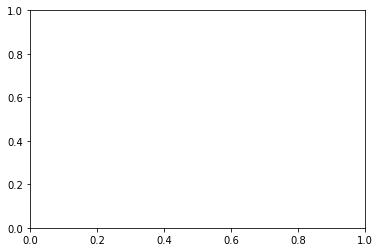

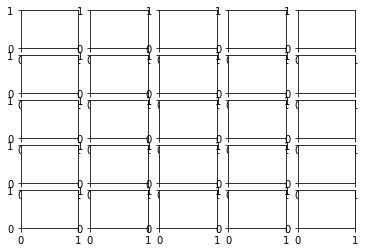

In [32]:
trainer.tf_env.reset()
fig,ax = plt.subplots()
fig2,axes_ = plt.subplots(5,5)
trainer.evaluate_agent(50)
obs=trainer.observer.observations()[-25:]
trainer.observer.plot_reward(ax=ax,slice_=slice(-25,None,None))
for o,ax_ in zip(obs,fig2.axes):
    res = plot_obs(o,ax_)
res

In [33]:
create_policy_eval_video(train_env,environment,trainer.agent.policy,SOLUTION_NAME,num_episodes=10,fps=5)

In [34]:
create_policy_eval_video(train_env,environment,random_tf_policy.RandomTFPolicy(train_env.time_step_spec(),train_env.action_spec()),SOLUTION_NAME + "_random",num_episodes=10,fps=5)